In [53]:
import numpy as np
import pandas as pd
from PIL import Image
from ast import literal_eval

import matplotlib.pyplot as plt

# Dataset Introduction

In this short introduction you will see how the different csv data files are connected and can be combined in order to complete the following tasks:

- load metadata
- load transliterations
- download tablet images
- plot tablet segments
- plot bounding box annotations
- plot line annotations

In the following we will demonstrate these tasks on a single clay tablet from the dataset. So we first pick a collection and a tablet to work with.

## Pick a collection 
All clay tablets in this dataset are organized in collections. Except for the train and test set we follow the collection structure of SAA.

In [54]:
selected_collection = 'test'

In [55]:
# read csv file
seg_df = pd.read_csv('./segments/tablet_segments_{}.csv'.format(selected_collection))
# convert bbox to np array
seg_df.bbox = seg_df.bbox.apply(literal_eval).apply(np.array)
# remove unassigned segments
seg_df = seg_df[seg_df.assigned]
# show first few entries
seg_df

segm_idx tablet_CDLI view_desc collection                     bbox  scale  \
0          0     ND02486       Rev       test  [391, 1734, 1201, 2825]   1.41   
1          1     ND02486       Obv       test   [382, 343, 1196, 1431]   1.63   
7          7      K08396       Rev       test  [433, 1312, 1384, 2304]   3.60   
8          8      K08396       Obv       test    [406, 83, 1360, 1046]   3.60   
11        11    BM099070       Obv       test   [523, 362, 1500, 1326]   1.87   
16        16     P334926       Obv       test    [374, 61, 1260, 1022]   3.23   
17        17     P334926       Rev       test  [397, 1320, 1259, 2284]   3.23   
18        18     P334932       Obv       test  [276, 1260, 1345, 2103]   2.57   
19        19     P334932       Rev       test  [285, 2992, 1341, 3836]   2.57   
20        20     P336128       Obv       test     [374, 52, 1474, 831]   2.59   
21        21     P336128       Rev       test  [372, 1157, 1473, 1920]   2.59   
22        22     P336150       Obv       test   [520, 154, 1433, 1320]   2.55   
23        23     P336150       Rev       test  [516, 1661, 1429, 2839]   2.55   
24        24     P336158       Rev       test   [398, 793, 1112, 1164]   3.17   
25        25     P336158       Obv       test     [404, 63, 1108, 433]   3.17   
26        26    K09237Vs       Obv       test        [27, 0, 965, 837]   3.57   

    assigned  
0       True  
1       True  
7       True  
8       True  
11      True  
16      True  
17      True  
18      True  
19      True  
20      True  
21      True  
22      True  
23      True  
24      True  
25      True  
26      True

## Pick a tablet
Attention: for a couple of tablets in the train and test collection we used the accession no. instead of the cdli no.

In [56]:
selected_cdli = 'P334926'

# select slice from dataframe
seg_df_slice = seg_df[seg_df.tablet_CDLI.isin([selected_cdli])]
seg_df_slice

segm_idx tablet_CDLI view_desc collection                     bbox  scale  \
16        16     P334926       Obv       test    [374, 61, 1260, 1022]   3.23   
17        17     P334926       Rev       test  [397, 1320, 1259, 2284]   3.23   

    assigned  
16      True  
17      True

For this tablet there are two segments. While some tablets often have more available views, we assigned at most the obverse and reverse views. 

Individual segments can be uniquely identified by their tablet_CDLI together with the segm_idx columns. For these two segments their indices are 16 and 17.

In [57]:
seg_df_slice.segm_idx

16    16
17    17
Name: segm_idx, dtype: int64

## Load corresponding transliteration
Given the collection and tablet, we load the corresponding transliteration.

In [58]:
# load transliterations of collection
tl_df = pd.read_csv('./transliterations/transliterations_{}.csv'.format(selected_collection))

The *tablet_CDLI* and *segm_idx* columns serve as unique selection key.

In [59]:
tl_df = tl_df.set_index(['tablet_CDLI', 'segm_idx']).sort_index()

For each segment we display the first view rows of the transliteration. 

In [60]:
for i, s_rec in seg_df_slice.iterrows():
    print(s_rec.tablet_CDLI, s_rec.view_desc)
    display(tl_df.loc[(selected_cdli, s_rec.segm_idx)].head())

P334926 Obv


view_desc  rec_idx  line_idx  pos_idx  train_label  \
tablet_CDLI segm_idx                                                      
P334926     16             Obv        0         0        0           30   
            16             Obv        1         0        1            4   
            16             Obv        2         0        2          103   
            16             Obv        3         0        3          183   
            16             Obv        4         0        4           14   

                      mzl_label  status  
tablet_CDLI segm_idx                     
P334926     16              490       1  
            16              110       1  
            16              635       1  
            16              258       1  
            16              748       1

P334926 Rev


view_desc  rec_idx  line_idx  pos_idx  train_label  \
tablet_CDLI segm_idx                                                      
P334926     17             Rev        0         0        0            2   
            17             Rev        1         0        1          158   
            17             Rev        2         0        2          193   
            17             Rev        3         0        3            1   
            17             Rev        4         0        4           30   

                      mzl_label  status  
tablet_CDLI segm_idx                     
P334926     17                1       1  
            17              485       1  
            17               71       1  
            17              859       1  
            17              490       1

The *record index* (rec_idx) identifies the  entry position inside the transliteration of the segment. The *line index* (line_idx) identifies the line inside the segment and the *position index* (pos_idx) identifies the sign inside the line.

## Load corresponding bounding box annotations

We will load the annotations and display them in the images. 

Since *test* collection is part of *test_full*, we will load the *test_full* bounding box annotations.

In [61]:
# load bbox annoations of collection
anno_df = pd.read_csv('./annotations/bbox_annotations_{}_full.csv'.format(selected_collection))
# convert bbox and relative bbox to np array
anno_df.relative_bbox = anno_df.relative_bbox.apply(literal_eval).apply(np.array)

In [62]:
# select slice of the dataset corresponding to entries of the selected cdli
anno_df_slice = anno_df[anno_df.tablet_CDLI == selected_cdli]
anno_df_slice.head()

segm_idx tablet_CDLI view_desc collection  mzl_label  train_label  \
116        17     P334926       Rev       test        490           30   
117        17     P334926       Rev       test        567           96   
118        17     P334926       Rev       test         71          193   
119        17     P334926       Rev       test        859            1   
120        17     P334926       Rev       test        583          234   

                       bbox        relative_bbox  
116  [735, 1393, 818, 1431]  [338, 73, 421, 111]  
117  [811, 1388, 876, 1429]  [414, 68, 479, 109]  
118  [612, 1405, 693, 1446]  [215, 85, 296, 126]  
119  [689, 1399, 741, 1443]  [292, 79, 344, 123]  
120  [855, 1381, 964, 1429]  [458, 61, 567, 109]

We can easily check, how many annotations are available for the two segments of the tablet.

In [63]:
anno_df_slice['view_desc'].value_counts()

Obv    175
Rev     27
Name: view_desc, dtype: int64

## Load the composite image from CDLI

Now we load the image from the CDLI webpage and store it for further processing.

In [64]:
import urllib.request

Using the cdli number we can generate an link to the image. You open it in the browser to verify it works.

In [65]:
# define url
url_template = 'https://cdli.ucla.edu/dl/photo/{}.jpg'
image_url = url_template.format(selected_cdli)
print(image_url)

https://cdli.ucla.edu/dl/photo/P334926.jpg


In [66]:
# load image
im = Image.open(urllib.request.urlopen(image_url))

In [67]:
# store image
im.save('./images/{}/{}.jpg'.format(selected_collection, selected_cdli))

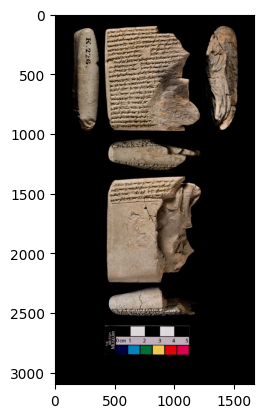

In [68]:
# plot image
plt.imshow(np.asarray(im))
plt.show()

## Visualize segments

First we visualize the tablet segments by cropping them from the composite image that is available at the CDLI webpage.

In [69]:
def crop_segment_from_image(im, bb):
    """
    im: pil image
    bb: list of segment bounding box coordinates as xmin, ymin, xmax, ymax.
    return: cropped segment as pil image
    """
    return im.crop((bb[0], bb[1], bb[2], bb[3]))

The segments are defined in terms of bounding boxes in the composite image.

Bounding boxes are rectangles that are defined by two extreme points in the format [xmin, ymin, xmax, ymax]. These two points describe the endpoints of a diagonal of the rectangle.

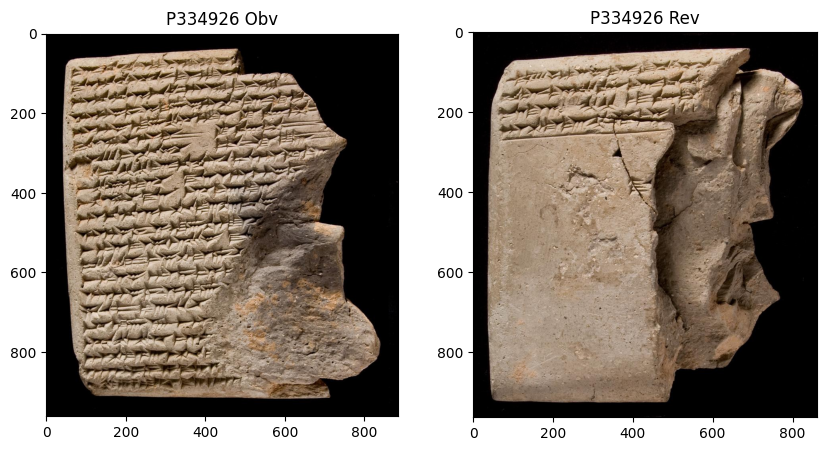

In [70]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
for i, (si, s_rec) in enumerate(seg_df_slice.iterrows()):
    path_to_image = './images/test/{}.jpg'.format(s_rec.tablet_CDLI)
    # open tablet image
    pil_im = Image.open(path_to_image)
    # crop segment
    tablet_seg = crop_segment_from_image(pil_im, s_rec.bbox)
    # plot segment
    ax[i].imshow(np.asarray(tablet_seg))
    ax[i].set_title("{} {}".format(s_rec.tablet_CDLI, s_rec.view_desc))
plt.show()

## Visualize bounding box annotations

Now lets plot the bounding boxes. For each annotation there is a bbox and a relative bbox available. The coordinates of the relative bbox describe the position of the bbox in the cropped segment.

In [71]:
def plot_boxes(boxes, labels, ax=None):
    # setup figure if necessary
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 12))
    # iterate over bounding boxes
    for ii, bbox in enumerate(boxes):
        # plot box
        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                          fill=False, edgecolor='blue', alpha=0.8, linewidth=2.0)) 
        # plot label
        ax.text(bbox[0], bbox[1] - 2, '{}'.format(labels[ii]),
                      bbox=dict(facecolor='blue', alpha=0.4), fontsize=8, color='white')

Signs are defined in terms of bounding boxes in the tablet image. Similar to the bounding boxes that describe a segment bounding boxes are rectangles that are defined by two extreme points in the format [xmin, ymin, xmax, ymax]. 

Each bounding box annotation comes with a label indicating the sign class. the mzl_label follows the convention estabilished in Borger's "Mesopotamisches Zeichenlexikon (MZL)". The other label is used for training the sign detector. There is a bijective mapping between the two labelings that is provided in the labels.json file.



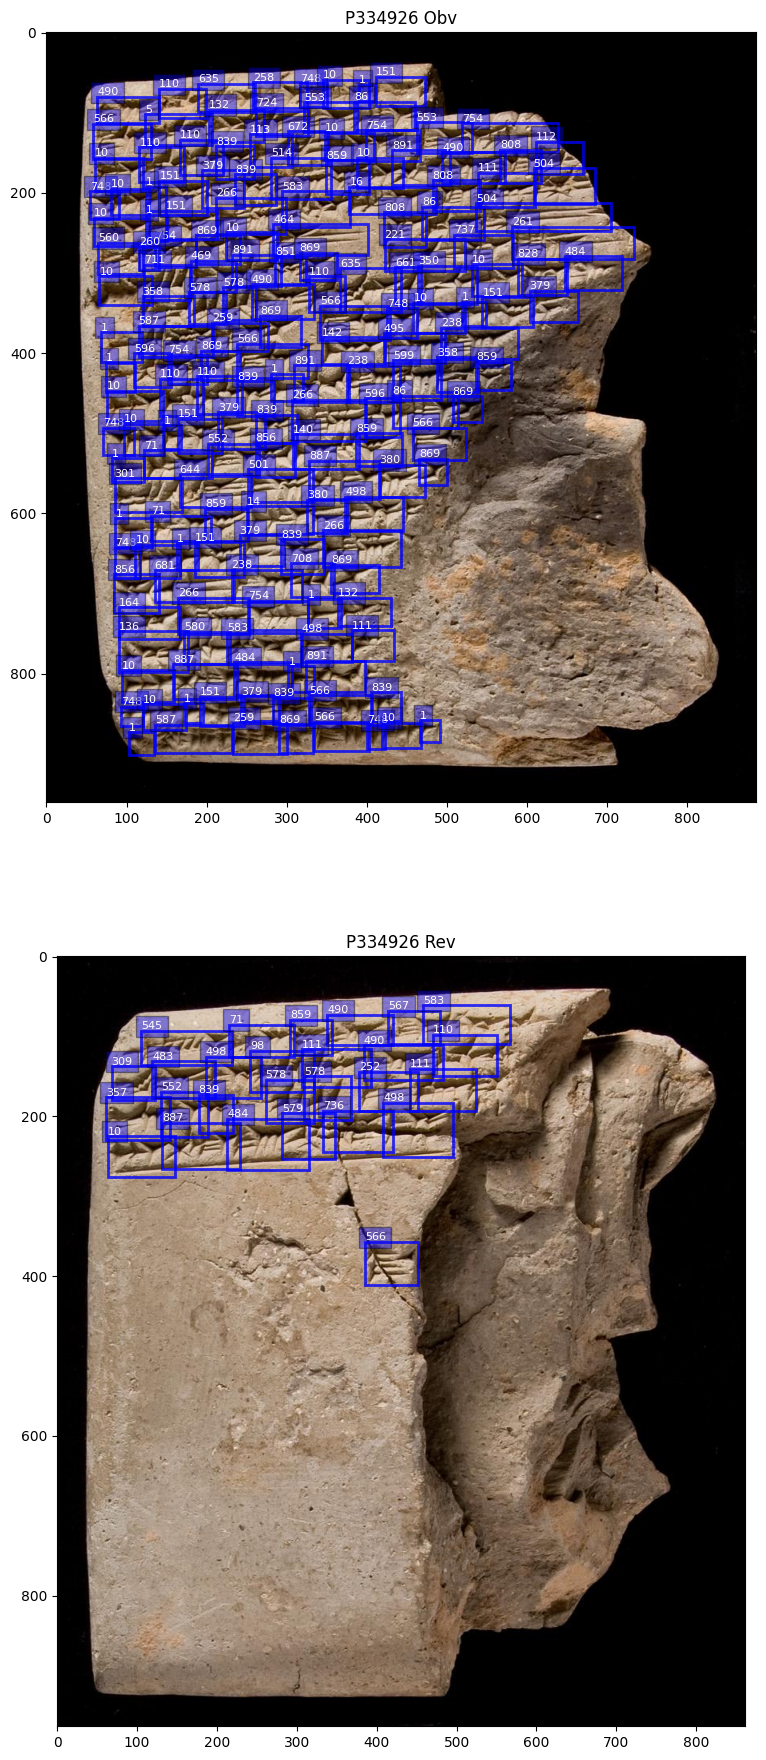

Detected signs labels:
[490, 567, 71, 859, 583, 545, 309, 483, 498, 98, 111, 490, 110, 357, 552, 839, 578, 578, 252, 111, 10, 887, 484, 579, 736, 498, 566]
Detected signs positions:
[array([338,  73, 421, 111]), array([414,  68, 479, 109]), array([215,  85, 296, 126]), array([292,  79, 344, 123]), array([458,  61, 567, 109]), array([105,  93, 219, 136]), array([ 68, 137, 122, 180]), array([119, 131, 198, 177]), array([186, 125, 255, 177]), array([242, 118, 321, 169]), array([306, 116, 393, 163]), array([384, 111, 483, 155]), array([470,  98, 550, 150]), array([ 61, 176, 141, 229]), array([130, 169, 189, 226]), array([177, 173, 220, 221]), array([261, 154, 322, 208]), array([309, 150, 368, 204]), array([378, 144, 452, 193]), array([442, 140, 524, 193]), array([ 63, 225, 148, 276]), array([131, 208, 229, 266]), array([213, 203, 315, 267]), array([282, 196, 348, 253]), array([333, 193, 421, 245]), array([408, 183, 496, 251]), array([385, 357, 452, 411])]


In [72]:
fig, ax = plt.subplots(2,1, figsize=(18, 22))
detected_sign_lbls = []
detected_sign_pos = []

for i, (si, s_rec) in enumerate(seg_df_slice.iterrows()):
    path_to_image = './images/test/{}.jpg'.format(s_rec.tablet_CDLI)
    # open tablet image
    pil_im = Image.open(path_to_image)
    # crop segment
    tablet_seg = crop_segment_from_image(pil_im, s_rec.bbox)
    # plot segment
    ax[i].imshow(np.asarray(tablet_seg))
    ax[i].set_title("{} {}".format(s_rec.tablet_CDLI, s_rec.view_desc))
    
    # select annotations
    selected_segm = (anno_df_slice.segm_idx == s_rec.segm_idx)
    sign_bboxes = np.stack(anno_df_slice[selected_segm].relative_bbox.values)
    sign_lbls = anno_df_slice[selected_segm].mzl_label.values

    if i == 1:
        detected_sign_lbls = list(sign_lbls)
        detected_sign_pos = list(anno_df_slice[selected_segm].relative_bbox.values)
    
    # plot boxes
    plot_boxes(sign_bboxes, sign_lbls, ax=ax[i])
plt.show()

print("Detected signs labels:")
print(detected_sign_lbls)

print("Detected signs positions:")
print(detected_sign_pos)

## Load line annotations

There are only line annotations available for train and test collections. 

We will load the line annotations corresponding to the tablet we selected above.

In [73]:
line_df = pd.read_csv('./annotations/line_annotations_{}.csv'.format(selected_collection))
line_df.head()

line_idx    x    y  segm_idx tablet_CDLI
0         0  128  175         0     ND02486
1         0  307  155         0     ND02486
2         0  596  162         0     ND02486
3         1  307   81         0     ND02486
4         1  448   78         0     ND02486

Annotated lines consist of one or several connected segments that are defined by the start or end points of segments. The *line index (line_idx)* identifies the points belonging to a line. The points are sorted by their x coordinate from left to right. 

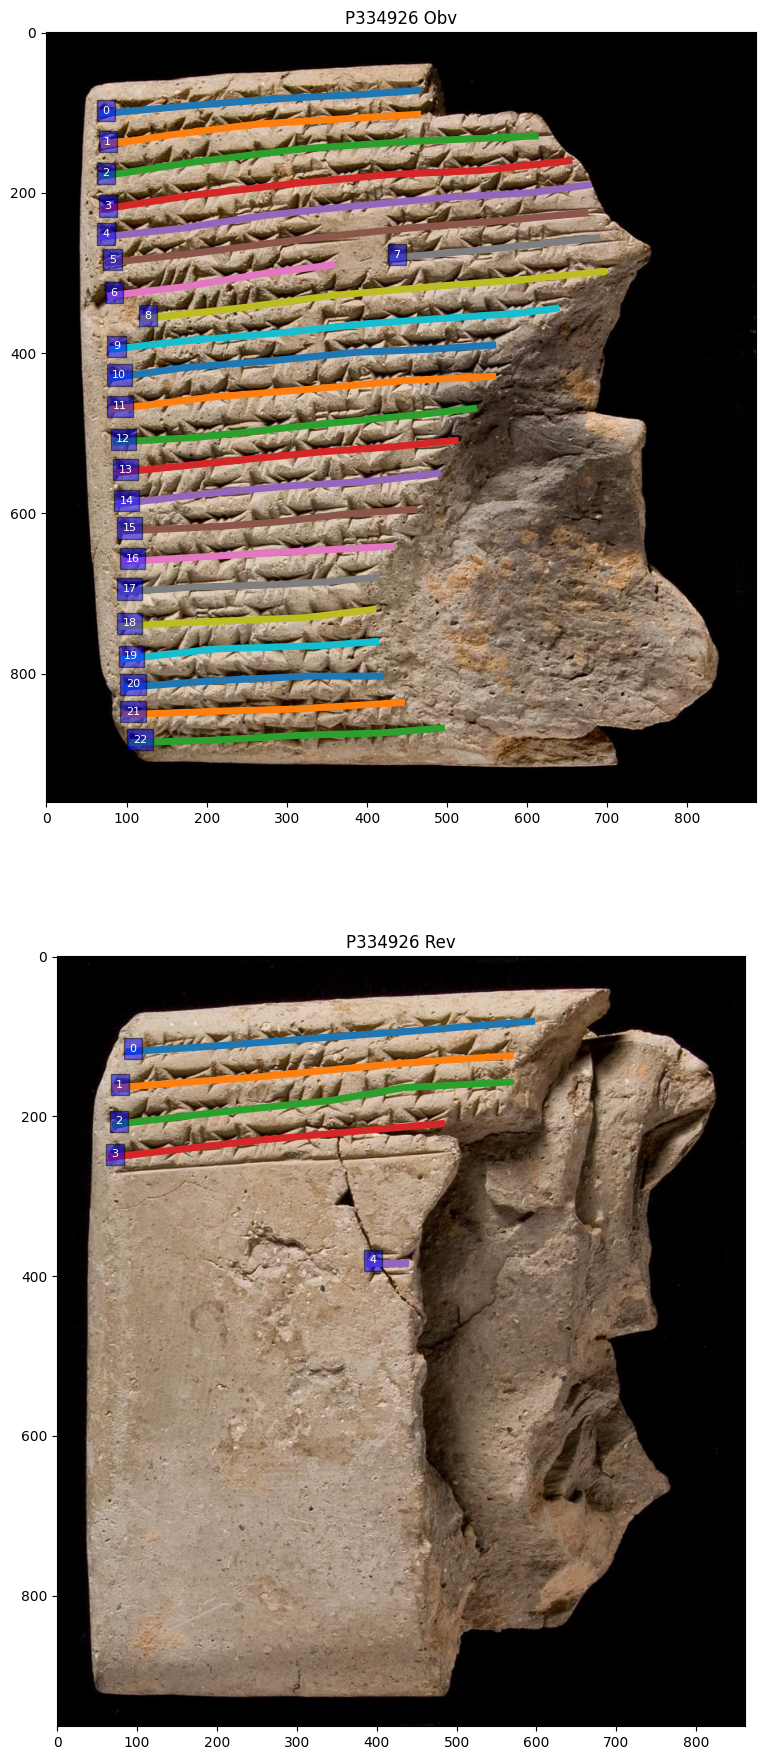

In [74]:
fig, ax = plt.subplots(2,1, figsize=(18, 22))
line_pos = []

for i, (si, s_rec) in enumerate(seg_df_slice.iterrows()):
    path_to_image = './images/test/{}.jpg'.format(s_rec.tablet_CDLI)
    # open tablet image
    pil_im = Image.open(path_to_image)
    # crop segment
    tablet_seg = crop_segment_from_image(pil_im, s_rec.bbox)

    # select line annotations
    line_df_slice = line_df[line_df.segm_idx == s_rec.segm_idx]

    # plot line annotations
    grouped = line_df_slice.groupby('line_idx')
    for li, line_rec in grouped:
        # plot single line as piece-wise linear function
        ax[i].plot(line_rec.x.values, line_rec.y.values, linewidth=5)

        if i == 1:
            line_pos.append(line_rec.y.values[0])

        # annotated line with line index
        ax[i].text(line_rec.x.values[0], line_rec.y.values[0], 
                   '{}'.format(line_rec.line_idx.values[0]),
                   bbox=dict(facecolor='blue', alpha=0.5), fontsize=8, color='white')  
    # plot image
    ax[i].imshow(np.asarray(tablet_seg), cmap='gray')
    ax[i].set_title("{} {}".format(s_rec.tablet_CDLI, s_rec.view_desc))
plt.show()

## Recognizing signs

Using the labels and sign positions from bounding box annotations 

And line position from Line annotation

We will recognize each sign in the order

In [75]:
# Create a list to store rectangles sorted by lines
sorted_rectangles = {}

# Sort rectangles by lines
for line_y in range(len(line_pos)):
    line_wise = {}
    for i in range(len(detected_sign_pos)):
        if detected_sign_pos[i][1] < line_pos[line_y]-25:
            line_wise[tuple(detected_sign_pos[i])] = detected_sign_lbls[i]

    # Sort line_wise based on xmin
    sorted_line_wise = dict(sorted(line_wise.items(), key=lambda x: x[0][0]))

    # Add sorted_line_wise to sorted_rectangles
    sorted_rectangles.update(sorted_line_wise)

for box, label in sorted_rectangles.items():
    print(f"Box: {box}, Label: {label}")

Box: (105, 93, 219, 136), Label: 545
Box: (215, 85, 296, 126), Label: 71
Box: (292, 79, 344, 123), Label: 859
Box: (338, 73, 421, 111), Label: 490
Box: (414, 68, 479, 109), Label: 567
Box: (458, 61, 567, 109), Label: 583
Box: (68, 137, 122, 180), Label: 309
Box: (119, 131, 198, 177), Label: 483
Box: (186, 125, 255, 177), Label: 498
Box: (242, 118, 321, 169), Label: 98
Box: (306, 116, 393, 163), Label: 111
Box: (384, 111, 483, 155), Label: 490
Box: (470, 98, 550, 150), Label: 110
Box: (61, 176, 141, 229), Label: 357
Box: (130, 169, 189, 226), Label: 552
Box: (177, 173, 220, 221), Label: 839
Box: (261, 154, 322, 208), Label: 578
Box: (309, 150, 368, 204), Label: 578
Box: (378, 144, 452, 193), Label: 252
Box: (408, 183, 496, 251), Label: 498
Box: (442, 140, 524, 193), Label: 111
Box: (63, 225, 148, 276), Label: 10
Box: (131, 208, 229, 266), Label: 887
Box: (213, 203, 315, 267), Label: 484
Box: (282, 196, 348, 253), Label: 579
Box: (333, 193, 421, 245), Label: 736
Box: (385, 357, 452, 411)

In [76]:
#Getting the signs corresponding to each box
import re

sign = ""

symbols_data = pd.read_excel('./symbols/symbol.xlsx')
print(symbols_data.columns)

for box, label in sorted_rectangles.items():
    data = symbols_data[symbols_data['MesZL'] == label].head(1)

    clean_symbol = re.sub(r'[U+\d]', '', data.iloc[0]['Glyph/Unicode Code Point'])
    sign += re.sub(r'[a-zA-Z]', '', clean_symbol)
    print(label, sign)

Index(['MesZL', 'ŠL/HA', 'aBZL', 'HethZL', 'Unnamed: 4', 'Sign Name',
       'Glyph/Unicode Code Point', 'Unicode Name', 'Comments'],
      dtype='object')
545  𒌘
71  𒌘 𒌷
859  𒌘 𒌷 𒃻
490  𒌘 𒌷 𒃻 𒌑
567  𒌘 𒌷 𒃻 𒌑 𒋗
583  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻
309  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠
483  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥
498  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊
98  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬
111  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒
490  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑
110  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾
357  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖
552  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠
839  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀
578  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳
578  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳
252  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿
498  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊
111  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒
10  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒 𒀭
887  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒 𒀭 𒊩 &  𒌆
484  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒 𒀭 𒊩 &  𒌆 𒆤
579  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒 𒀭 𒊩 &  𒌆 𒆤 𒊺
736  𒌘 𒌷 𒃻 𒌑 𒋗 𒊻 𒄠 𒈥 𒂊 𒈬 𒊒 𒌑 𒈾 𒅖 𒈠 𒀀 𒆳 𒆳 𒄿 𒂊 𒊒 𒀭 𒊩 &  𒌆 𒆤

In [77]:
%pip install torch torchvision
%pip install allennlp==0.8.5
%pip install torchtext==0.5.0 --user
%pip install akkadian

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\SANYAM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Obtaining dependency information for allennlp==0.8.5 from https://files.pythonhosted.org/packages/3f/bc/e30325523363215c503171822f09436adcfbc74f426ad62496276f1ac4c0/allennlp-0.8.5-py3-none-any.whl.metadata
  Using cached allennlp-0.8.5-py3-none-any.whl.metadata (11 kB)
INFO: pip is looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.2.0 Requires-Python ==3.6
ERROR: Could not find a version that satisfies the requirement torch<1.2,>=0.4.1 (from allennlp) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for torch<1.2,>=0.4.1

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\SANYAM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Obtaining dependency information for torchtext==0.5.0 from https://files.pythonhosted.org/packages/79/ef/54b8da26f37787f5c670ae2199329e7dccf195c060b25628d99e587dac51/torchtext-0.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/73.2 kB ? eta -:--:--
   ---------------------- ----------------- 41.0/73.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 73.2/73.2 kB 998.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\SANYAM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\SANYAM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [83]:
import akkadian.transliterate as akk

converted_text = akk.transliterate_memm(sign)

C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.23.0 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [84]:
print('conversion using hmm model', converted_text)

conversion using hmm model IGI-et {IM}-{URU}-har-ša₂ SILIM u₂-kin₂ šu-kut-uṣ-{GU₄}-am-man e-tel-mu-šab u₂-kin-na-kut-iš-iq-ma UKKIN a-šar {KUR}-ZALAG₂ {KUR}-sin-i-pe-e-tel-ru-tum {d}-U.GUR nin GADA kit-{GU₄}-še-rib di HE₂.ša 


In [91]:
import requests

model_url = "https://api-inference.huggingface.co/models/praeclarum/cuneiform"
payload = {"inputs": converted_text, "parameters": {}}

response = requests.post(model_url, json=payload)

if response.status_code == 200:
    translation = response.json()
    print("Translated text:", translation)
else:
    print("Error:", response.status_code, response.text)

Error: 429 {"error":"Rate limit reached. Please log in or use a HF access token"}
